<a href="https://colab.research.google.com/github/birusolankar/Machine-Learning/blob/main/ipl_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=bc6184426dbd9861d39ee543c9bed2f2cc6de716ba8720f499d67c7c378b67e6
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [3]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.appName("ubutils").getOrCreate()

In [8]:
df = spark.read.csv("/content/deliveries.csv", inferSchema = True, header = True)

In [9]:
df.show(10)

+--------+------+-------------------+--------------------+----+----+---------+-----------+-----------+-------------+---------+--------+-----------+-----------+------------+------------+----------+----------+----------------+--------------+-------+
|match_id|inning|       batting_team|        bowling_team|over|ball|  batsman|non_striker|     bowler|is_super_over|wide_runs|bye_runs|legbye_runs|noball_runs|penalty_runs|batsman_runs|extra_runs|total_runs|player_dismissed|dismissal_kind|fielder|
+--------+------+-------------------+--------------------+----+----+---------+-----------+-----------+-------------+---------+--------+-----------+-----------+------------+------------+----------+----------+----------------+--------------+-------+
|       1|     1|Sunrisers Hyderabad|Royal Challengers...|   1|   1|DA Warner|   S Dhawan|   TS Mills|            0|        0|       0|          0|          0|           0|           0|         0|         0|            null|          null|   null|
|       

In [10]:
import pandas as pd
import numpy as np

In [24]:
# reading ipl dataset
ipl = pd.read_csv("/content/deliveries.csv")


In [28]:
# finding the batsman names
ipl['batsman'].unique()

array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'CH Gayle', 'Mandeep Singh', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'YS Chahal', 'TS Mills', 'A Choudhary', 'PA Patel', 'JC Buttler',
       'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
       'HH Pandya', 'TG Southee', 'AM Rahane', 'MA Agarwal', 'SPD Smith',
       'BA Stokes', 'MS Dhoni', 'JJ Roy', 'BB McCullum', 'SK Raina',
       'AJ Finch', 'KD Karthik', 'G Gambhir', 'CA Lynn', 'MK Tiwary',
       'DT Christian', 'HM Amla', 'M Vohra', 'WP Saha', 'AR Patel',
       'GJ Maxwell', 'DA Miller', 'Vishnu Vinod', 'Iqbal Abdulla',
       'P Negi', 'AP Tare', 'SW Billings', 'KK Nair', 'SV Samson',
       'RR Pant', 'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'A Mishra',
       'S Nadeem', 'Z Khan', 'DR Smith', 'DS Kulkarni', 'P Kumar',
       'Basil Thampi', 'RV Uthappa', 'MK Pandey', 'YK Pathan', 'SA Yadav',
       'CR Woa

In [42]:
# finding the records of the Rohit Sharma for analysis
sharma = ipl[ipl['batsman'] == 'RG Sharma']
print(sharma.shape)
sharma.head()

(3816, 21)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
275,2,1,Mumbai Indians,Rising Pune Supergiant,5,3,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
276,2,1,Mumbai Indians,Rising Pune Supergiant,5,4,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
278,2,1,Mumbai Indians,Rising Pune Supergiant,5,6,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
279,2,1,Mumbai Indians,Rising Pune Supergiant,6,1,RG Sharma,JC Buttler,DL Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
285,2,1,Mumbai Indians,Rising Pune Supergiant,7,1,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [40]:
# fidning the highest runs of the Sharma
sharma.groupby("match_id")['batsman_runs'].sum().sort_values(ascending = False).head(1)

match_id
363    109
Name: batsman_runs, dtype: int64

In [41]:
sharma.groupby("match_id")['batsman_runs'].sum().sort_values(ascending = False).head(10)

match_id
363     109
518      98
7907     97
257      87
605      85
581      84
421      79
77       76
390      74
408      73
Name: batsman_runs, dtype: int64

In [43]:
# creating a function to calculate the highest score of the player

def highest_score(batsman):
  temp_df = ipl[ipl['batsman'] == batsman]
  return temp_df.groupby("match_id")['batsman_runs'].sum().sort_values(ascending = False).head(1)

In [53]:
highest_score('S Dhawan')

match_id
11317    98
Name: batsman_runs, dtype: int64

In [58]:
sharma = ipl[ipl['batsman'] == 'RG Sharma']
sharma.groupby("bowling_team")['batsman_runs'].sum()

bowling_team
Chennai Super Kings            710
Deccan Chargers                175
Delhi Capitals                  45
Delhi Daredevils               703
Gujarat Lions                   82
Kings XI Punjab                590
Kolkata Knight Riders          827
Mumbai Indians                 103
Pune Warriors                  135
Rajasthan Royals               455
Rising Pune Supergiant          86
Rising Pune Supergiants         92
Royal Challengers Bangalore    693
Sunrisers Hyderabad            218
Name: batsman_runs, dtype: int64

In [59]:
# create a function to get total score of the each player against each team
def total_score_against_team(batsman):
  temp_df = ipl[ipl['batsman'] == batsman]
  return temp_df.groupby("bowling_team")['batsman_runs'].sum()

In [60]:
# Rohit Sharmas total score against each in ipl
total_score_against_team('RG Sharma')

bowling_team
Chennai Super Kings            710
Deccan Chargers                175
Delhi Capitals                  45
Delhi Daredevils               703
Gujarat Lions                   82
Kings XI Punjab                590
Kolkata Knight Riders          827
Mumbai Indians                 103
Pune Warriors                  135
Rajasthan Royals               455
Rising Pune Supergiant          86
Rising Pune Supergiants         92
Royal Challengers Bangalore    693
Sunrisers Hyderabad            218
Name: batsman_runs, dtype: int64

In [61]:
# Vorat Kohlis total score against each team in an ipl
total_score_against_team('V Kohli')

bowling_team
Chennai Super Kings        749
Deccan Chargers            306
Delhi Capitals              66
Delhi Daredevils           763
Gujarat Lions              283
Kings XI Punjab            636
Kochi Tuskers Kerala        50
Kolkata Knight Riders      675
Mumbai Indians             628
Pune Warriors              128
Rajasthan Royals           370
Rising Pune Supergiant      83
Rising Pune Supergiants    188
Sunrisers Hyderabad        509
Name: batsman_runs, dtype: int64

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# plot graph of players runs against each team

def bar_chart_of_total_score_against_team(batsman):
  temp_df = ipl[ipl['batsman'] == batsman]
  return temp_df.groupby("bowling_team")['batsman_runs'].sum().sort_values(ascending = False).plot(kind = 'bar')

<Axes: xlabel='bowling_team'>

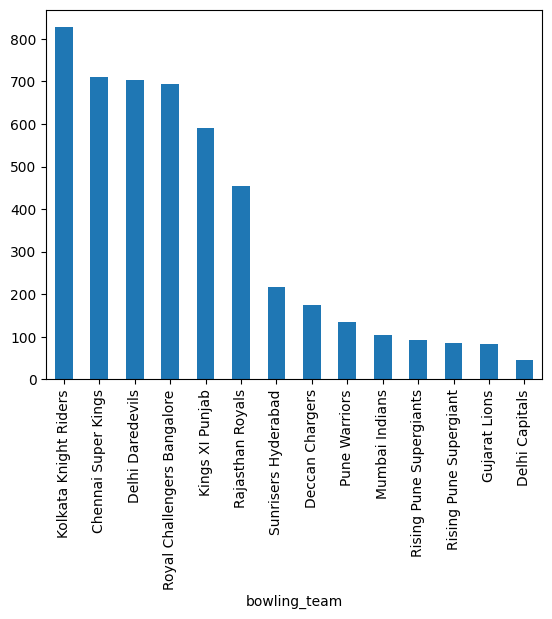

In [66]:
bar_chart_of_total_score_against_team('RG Sharma')

<Axes: xlabel='bowling_team'>

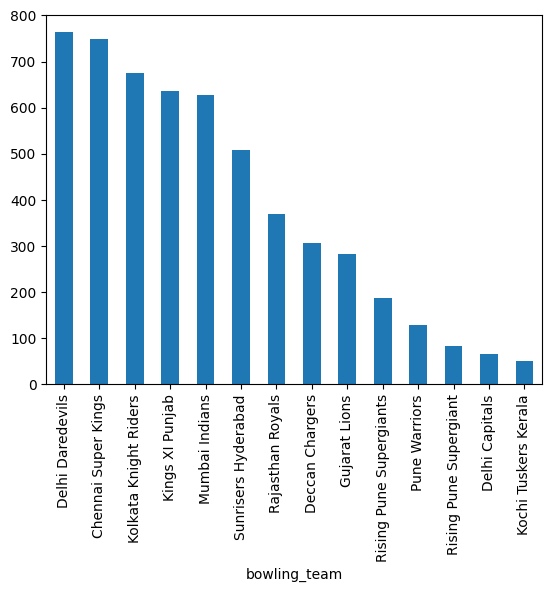

In [67]:
bar_chart_of_total_score_against_team('V Kohli')